# Group 7
## Bejjanki Pooja sree prasanna (2311609)
## Pavan Kalyan Yakkali (2249432)
## Teja Akula (1862814)
## Prajith Sai Macha (2313014)

## Step 2

2) Selecting Perform Variable Selection. Choose one of the following techniques and explain why you
selected that one.
*  Lasso: https://en.wikipedia.org/wiki/Lasso_(statistics))
* KNN
* Correlation

## Lasso was choosen for feature selection

Lasso is chosen for variable selection because it selects the most relevant featuress by shrinking less important coefficients to zero.
Lasso is the good choice  while handling multicollinearity and working well with large datasets.

## con's of other two mentioned methods are
KNN:
* Computationally expensive with large datasets.

Correlation:
* Only measures linear relationships, ignores non-linear associations.



In [ ]:
from sklearn.linear_model import LogisticRegression, Lasso

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
import pandas as pd
df = pd.read_csv('Group_7_Data_clean_woscale.csv')
df = df.drop(['Unnamed: 0'], axis = 1)
# Display the first few tuples of the dataset
df.head()

,age,housing,loan,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,...,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_nonexistent,poutcome_success,y
0,56,0,0,6,1,261,1,0,1.1,93.994,...,0,0,0,0,0,0,0,1,0,0
1,57,0,0,6,1,149,1,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0
2,37,1,0,6,1,226,1,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0
3,40,0,0,6,1,151,1,0,1.1,93.994,...,0,1,0,0,0,0,0,1,0,0
4,56,0,1,6,1,307,1,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
df.head()

,age,housing,loan,month,day_of_week,duration,campaign,previous,emp.var.rate,cons.price.idx,...,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_nonexistent,poutcome_success,y
0,56,0,0,6,1,261,1,0,1.1,93.994,...,0,0,0,0,0,0,0,1,0,0
1,57,0,0,6,1,149,1,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0
2,37,1,0,6,1,226,1,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0
3,40,0,0,6,1,151,1,0,1.1,93.994,...,0,1,0,0,0,0,0,1,0,0
4,56,0,1,6,1,307,1,0,1.1,93.994,...,0,0,0,1,0,0,0,1,0,0


In [ ]:
X = df.drop('y', axis=1)
y = df['y']

In [ ]:
# Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Compute correlation matrix
correlation_matrix = df.corr()


In [ ]:

# Get correlations with the target variable
target_correlations = correlation_matrix['y'].abs().sort_values(ascending=False)

In [ ]:
# Select features with correlation above a threshold (e.g., 0.5)
threshold = 0.15
selected_features = target_correlations[target_correlations >= threshold].index.tolist()
selected_features

['y',
 'duration',
 'nr.employed',
 'euribor3m',
 'emp.var.rate',
 'poutcome_nonexistent',
 'job_blue-collar',
 'marital_married',
 'education_basic.9y',
 'cons.price.idx',
 'campaign',
 'loan',
 'education_high.school',
 'housing',
 'job_technician',
 'poutcome_success',
 'job_services',
 'previous',
 'education_professional.course']

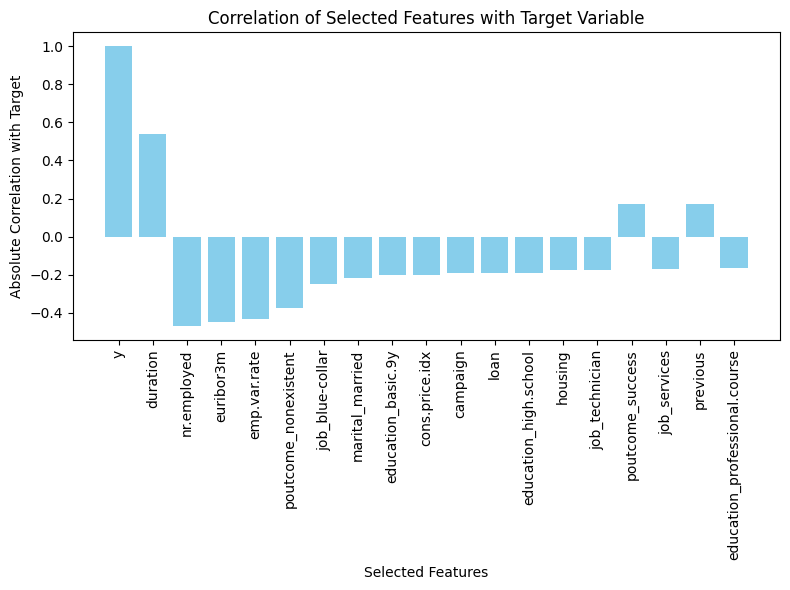

In [ ]:
selected_corr_values = [correlation_matrix.loc['y', feature] for feature in selected_features]
# Plotting the correlations of selected features with the target variable
plt.figure(figsize=(8, 6))
plt.bar(selected_features, selected_corr_values, color='skyblue')
plt.xlabel('Selected Features')
plt.ylabel('Absolute Correlation with Target')
plt.title('Correlation of Selected Features with Target Variable')
plt.xticks(rotation=90)
plt.tight_layout()

In [ ]:
from sklearn.model_selection import GridSearchCV, KFold

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42, stratify=y)


In [ ]:
lasso = Lasso()
search=GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-1,1,8)},n_jobs=1,refit=True,cv=10)
search.fit(X_train,y_train)
print(search.best_params_)
print(abs(search.best_score_))

{'alpha': 0.1}
0.49923170271004835


In [ ]:
names=df.drop("y", axis=1).columns
print("Column Names: {}".format(names.values))

Column Names: ['age' 'housing' 'loan' 'month' 'day_of_week' 'duration' 'campaign'
 'previous' 'emp.var.rate' 'cons.price.idx' 'cons.conf.idx' 'euribor3m'
 'nr.employed' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid'
 'job_management' 'job_retired' 'job_self-employed' 'job_services'
 'job_student' 'job_technician' 'job_unemployed' 'marital_married'
 'marital_single' 'education_basic.6y' 'education_basic.9y'
 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'poutcome_nonexistent' 'poutcome_success']


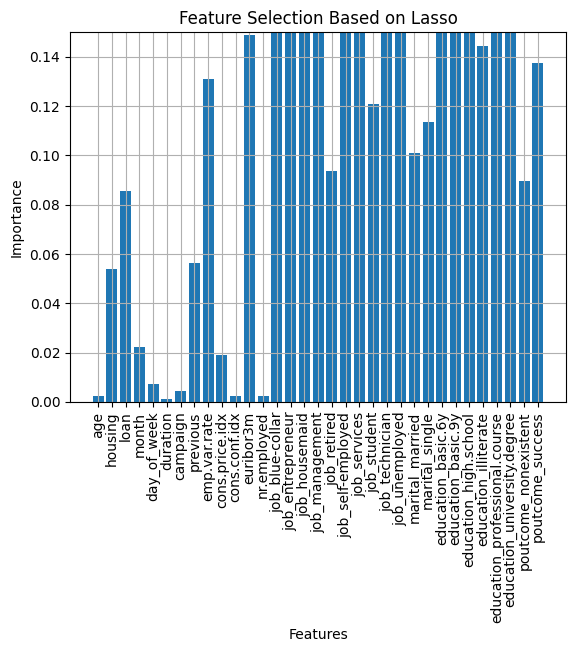

In [ ]:
lasso1 = Lasso(alpha=0.00001)
lasso1.fit(X_train, y_train)

# Using np.abs() to make coefficients positive.
lasso1_coef = np.abs(lasso1.coef_)

# plotting the Column Names and Importance of Columns.
plt.bar(names, lasso1_coef)
plt.xticks(rotation=90)
plt.grid()
plt.title("Feature Selection Based on Lasso")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.ylim(0, 0.15)
plt.show()

In [ ]:
feature_subset=np.array(names)[lasso1_coef>0.06]
print("Selected Feature Columns: {}".format(feature_subset))

# Adding the target to the list of feaatures.
feature_subset=np.append(feature_subset, "y")

Selected Feature Columns: ['loan' 'emp.var.rate' 'euribor3m' 'job_blue-collar' 'job_entrepreneur'
 'job_housemaid' 'job_management' 'job_retired' 'job_self-employed'
 'job_services' 'job_student' 'job_technician' 'job_unemployed'
 'marital_married' 'marital_single' 'education_basic.6y'
 'education_basic.9y' 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'poutcome_nonexistent' 'poutcome_success']


In [ ]:
print("Selected Columns: {}".format(feature_subset))

Selected Columns: ['loan' 'emp.var.rate' 'euribor3m' 'job_blue-collar' 'job_entrepreneur'
 'job_housemaid' 'job_management' 'job_retired' 'job_self-employed'
 'job_services' 'job_student' 'job_technician' 'job_unemployed'
 'marital_married' 'marital_single' 'education_basic.6y'
 'education_basic.9y' 'education_high.school' 'education_illiterate'
 'education_professional.course' 'education_university.degree'
 'poutcome_nonexistent' 'poutcome_success' 'y']


* After applying the Feature selection, selected features are 'loan' 'emp.var rate' 'euribor3m' 'job_blue-collar' 'job_entrepreneur' 'job_housemaid' 'job_management' 'job_retired' 'job_self-employed' 'job_services' 'job_student' 'job_technician' 'job_unemployed' 'marital_married' 'marital_single' 'education_basic.6y' 'education_basic.9y' 'education_high.school' 'education_illiterate' 'education_professional.course' 'education_university.degree' 'poutcome_nonexistent' 'poutcome_success' 'y'.

*  As it is a classification we tried to apply correlation and Lasso to cross verify what features are selecting by appliing both categories seperately. depend on the threshold value the features are selecting . In the above code mostly selecting same features by using both techniques.

* by considering the advantages of Lasso choose Lasso for feature selection

In [ ]:
df=df[feature_subset]
x=df.drop('y', axis=1)
y = df['y']

In [ ]:
x.head()

,loan,emp.var.rate,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,marital_married,marital_single,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,poutcome_nonexistent,poutcome_success
0,0,1.1,4.857,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,0,1.1,4.857,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
2,0,1.1,4.857,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0
3,0,1.1,4.857,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
4,1,1.1,4.857,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,0,1,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

X_test_scaled = scaler.transform(X_test)

In [ ]:
print("Shape of Train Features: {}".format(X_train.shape))
print("Shape of Test Features: {}".format(X_test.shape))
print("Shape of Train Target: {}".format(y_train.shape))
print("Shape of Test Target: {}".format(y_test.shape))

Shape of Train Features: (58459, 33)
Shape of Test Features: (14615, 33)
Shape of Train Target: (58459,)
Shape of Test Target: (14615,)


# step 5

### After feature selection step 2 also build (Based on the models compatibility with the data i.e classification or regression problem) (also write a 3 lines on what you understand about these models you are free to use online resources but please cite them):
*  XGBoost
* Extreme Machine Learning Model
* A basic deep learning model with two layers
* An Ensemble model containing the top 3 models overall

1. XGBoost:
* XGBoost is an optimized gradient boosting algorithm used for supervised learning tasks.
* Suited for both regression and classification problems, especially with structured/tabular data.
* It's an advanced boosting method that iteratively builds an ensemble of weak learners to make accurate predictions by learning from data patterns.
2. Extreme Learning Machine Model:
*  Extreme Learning Machines (ELMs) are single-layer feedforward neural networks.
* Efficient for regression and classification tasks, particularly with large-scale datasets.
* ELMs initialize input weights randomly, compute output weights analytically, and deliver rapid learning with minimal hyperparameter tuning.
3. Basic Deep Learning Model with Two Layers:
* A basic neural network architecture comprising an input layer, a hidden layer, and an output layer.
* Suitable for diverse problems, learning complex patterns from data in supervised settings.
* This model extracts hierarchical representations from data, making it effective for various machine learning tasks.

In [ ]:
import xgboost
print(xgboost.__version__)

2.0.2


# Ensemble model

In [ ]:
# Importing necessary libraries
import xgboost as xgb

In [ ]:
# Creating and training an XGBoost classifier
xgb_model = xgb.XGBClassifier()



In [ ]:
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:

# Making predictions on the test set
xgb_predictions = xgb_model.predict(X_test_scaled)


In [ ]:

# Calculating accuracy
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9446459117345193


## Extreme Machine Learning Model




In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(32,), activation='logistic', max_iter=1000, random_state=42)

In [ ]:
# Training the model
model.fit(X_train_scaled, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(32,), max_iter=1000,
              random_state=42)

In [ ]:
# Making predictions on the test set
predictions = model.predict(X_test_scaled)

In [ ]:
# Calculating accuracy
accuracy = accuracy_score(y_test, predictions)
print("Extreme Machine learning model Accuracy:", accuracy)

Extreme Machine learning model Accuracy: 0.9309613410879234


## Basic Deep Learning Model with Two Layers

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [ ]:
# Creating a basic deep learning model with two layers using TensorFlow/Keras
model = Sequential([
    Dense(32, activation='relu', input_shape=(33,)),  # Assuming 20 features
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [ ]:

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:

# Training the model
model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=0)


In [ ]:
# Evaluating the model on the test set
_, accuracy = model.evaluate(X_test, y_test)
print("Deep Learning Model Accuracy:", accuracy)

457/457 [==============================] - 1s 2ms/step - loss: 2083.8196 - accuracy: 0.5028
Deep Learning Model Accuracy: 0.5027711391448975


## An Ensemble model containing the top 3 models overall

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score


clf1 = RandomForestClassifier(n_estimators=100, random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = DecisionTreeClassifier(random_state=42)
VC = VotingClassifier(estimators=[('random forest', clf1),
                                  ('knn', clf2),
                                  ('decision tree', clf3)],
                      voting='hard')


for clf, name in zip([clf1, clf2, clf3, VC], ['random forest', 'knn', 'decision tree', 'Voting Classfier']):
    clf.fit(X_train, y_train)
    print(name,'Training accuracy:', clf.score(X_train, y_train))
    print(name, 'Test accuracy:', clf.score(X_test, y_test), '\n')

random forest Training accuracy: 0.9998460459467319
random forest Test accuracy: 0.9484091686623333 

knn Training accuracy: 0.9335431670059358
knn Test accuracy: 0.9200136845706466 

decision tree Training accuracy: 0.9998460459467319
decision tree Test accuracy: 0.9282928498118371 

Voting Classfier Training accuracy: 0.9998460459467319
Voting Classfier Test accuracy: 0.94580910023948 



## **Obseravations**
#### XgBoost Accuracy
* XGBoost Accuracy: 94.5%

#### Xtreme Machine learning model
* xtreme Machine learning model Accuracy: 93.1%

#### Basic Deep Learning Model with Two Layers
* Deep Learning Model Accuracy: 50.28 %

### An Ensemble model containing the top 3 models overall
#### Random Forest
* Random forest Training accuracy: 99.9 %
* Random forest Test accuracy: 94.8 %

#### KNN
* knn Training accuracy: 93.5%
* knn Test accuracy:  92.0%

#### Decision Tree
* decision tree Training accuracy: 99.9 %
* decision tree Test accuracy: 92.8 %

#### Ensemble Model by containing above model by using voting classifier
* Voting Classfier Training accuracy: 99.9 %
* Voting Classfier Test accuracy: 94.8 %